In [1]:
from codes.network import generate_network
from codes.simulations import diffuse_behavior

In [2]:
import imp
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
from pprint import pprint

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Get full graph

In [4]:
G = generate_network(level_f='./')

Create connections...
Nodes after connections:  906
Edges created :  9042

Create agents...
PA
gender
age
class
bmi
height
weight
Removing nodes not in the specified classes...
Nodes removed for not being in the selected classes: # 469
Nodes removed for not having data for BMI: # 14
Nodes remaining after removal: # 423
###############################################################
Graph generated successfuly!
###############################################################



In [5]:
# Returs a COPY of the subgraphs
#graphs_no_intervention = sorted(nx.weakly_connected_component_subgraphs(G), key=len, reverse=True)
#graphs_random = sorted(nx.weakly_connected_component_subgraphs(G), key=len, reverse=True)
#graphs_centrality = sorted(nx.weakly_connected_component_subgraphs(G), key=len, reverse=True)
#graphs_high_risk = sorted(nx.weakly_connected_component_subgraphs(G), key=len, reverse=True)

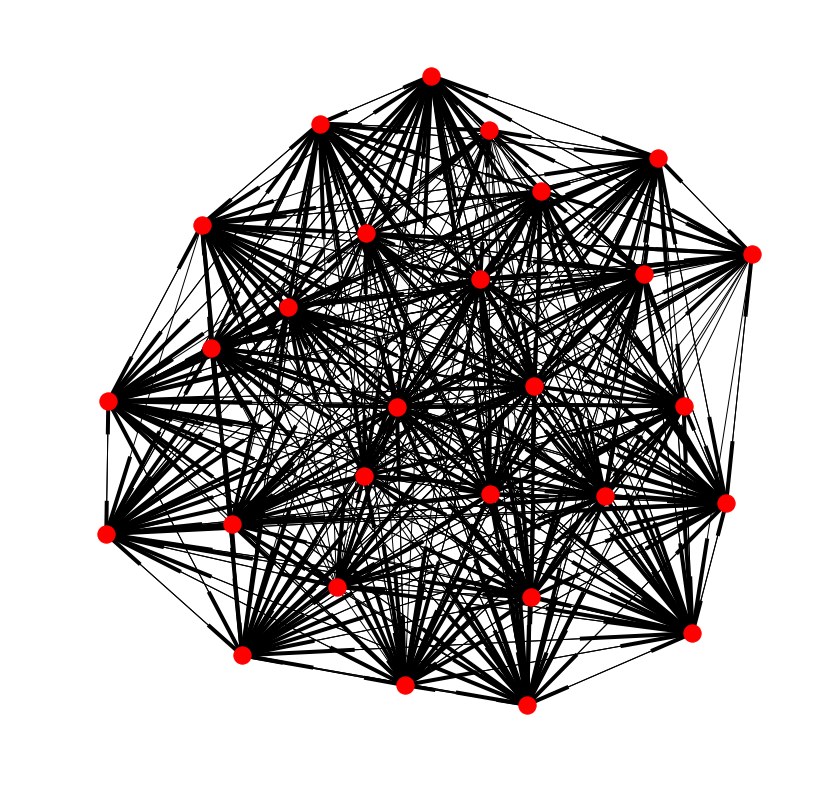

In [6]:
G0 = sorted(nx.weakly_connected_component_subgraphs(G), key=len, reverse=True)[0]
graph_layout = 'spring'

if graph_layout == 'spring':
    graph_pos=nx.spring_layout(G0)
elif graph_layout == 'spectral':
    graph_pos=nx.spectral_layout(G0)
elif graph_layout == 'random':
    graph_pos=nx.random_layout(G0)
else:
    graph_pos=nx.shell_layout(G0)

node_color = 'b'
node_size = 10
node_alpha = 0.4
node_text_size=6
edge_color='blue'
edge_alpha=0.3
edge_tickness=0.1
edge_text_pos=0.3
text_font='sans-serif'

plt.figure(figsize=((14,14)))
nx.draw_networkx_nodes(G0,graph_pos,node_size=node_size, alpha=node_alpha, node_color=node_color)
nx.draw_networkx_edges(G0,graph_pos,width=edge_tickness, alpha=edge_alpha,edge_color=edge_color)
#nx.draw_networkx_labels(G0, graph_pos,font_size=node_text_size, font_family=text_font)
nx.draw(G0,pos=graph_pos)


# Evaluate all components

### Smaller cluster

In [7]:
interventions_list = ['vulnerable', None, 'random', 'centrality', 'high_risk', 'max-influence']
#interventions_list = ['max-influence', None]
factor='PA'
objective='all'
BW_df = pd.DataFrame()
BMI_df = pd.DataFrame()

for intervention in interventions_list:
    BW_dict = {}
    BMI_dict = {}
    graph = sorted(nx.weakly_connected_component_subgraphs(G), key=len, reverse=True)[0]

    diffuse_behavior(graph=graph, intervention=intervention, factor=factor, objective=objective, years=2)
    results_dict = dict(graph.nodes(data=True))
    for k, v in results_dict.items():
        BW_dict[k] = results_dict[k]['BW_hist']
    for k, v in results_dict.items():
        BMI_dict[k] = results_dict[k]['BMI_hist']
    
    # Create label for no intervention
    intervention_label = 'No intervention' if intervention is None else intervention
    BW_df[intervention_label] = pd.DataFrame(BW_dict).T.mean()
    BMI_df[intervention_label] = pd.DataFrame(BMI_dict).T.mean()

Intervention started:  vulnerable
Cluster contains 28 nodes and 696 edges!
Simulation without interventions.
Cluster contains 28 nodes and 696 edges!
Intervention started:  random
Cluster contains 28 nodes and 696 edges!
Intervention started:  centrality
Cluster contains 28 nodes and 696 edges!
Intervention started:  high_risk
Cluster contains 28 nodes and 696 edges!
Intervention started:  max-influence

#######################################
Max-influence started!
Objective function:  all
#######################################

This max-influence simulation is for a network with 28 nodes and 696 edges
Number of nodes to select:  3
Impact node #1346: 	obese: 0.0000 	overweight: -16.0630 	both: -16.0630 	all: -21.2726 
Impact node #1347: 	obese: 0.0000 	overweight: -7.1466 	both: -7.1466 	all: -20.5821 
Impact node #1348: 	obese: 0.0000 	overweight: -0.1536 	both: -0.1536 	all: -26.4958 
Impact node #1349: 	obese: 0.0000 	overweight: -0.0890 	both: -0.0890 	all: -25.6023 
Impact node 

(0, 729)

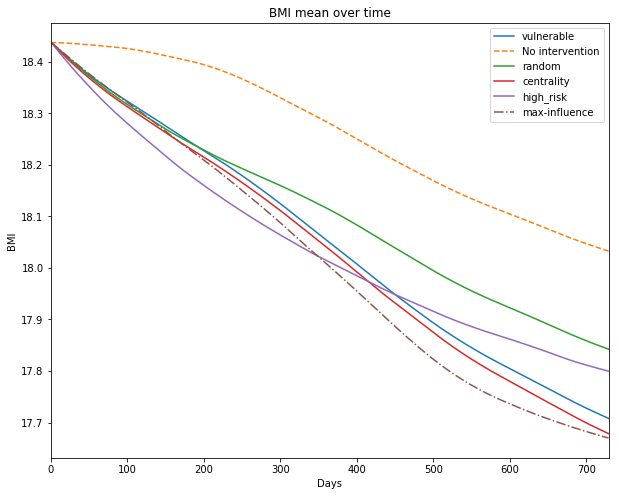

In [8]:
styles = {'vulnerable':'-', 'No intervention': '--', 'random': '-', 'centrality': '-', 'high_risk': '-', 
          'max-influence': '-.'}

#styles = ['b', 'r', 'g', 'y', 'b--']
BMI_df.plot(figsize=(10,8), style=styles)
plt.legend()
plt.title('BMI mean over time')
plt.xlabel('Days')
plt.ylabel('BMI')
#plt.ylim(19,20.25)
plt.xlim(0,729)

Text(0,0.5,'BW (Body Weight) - Kg')

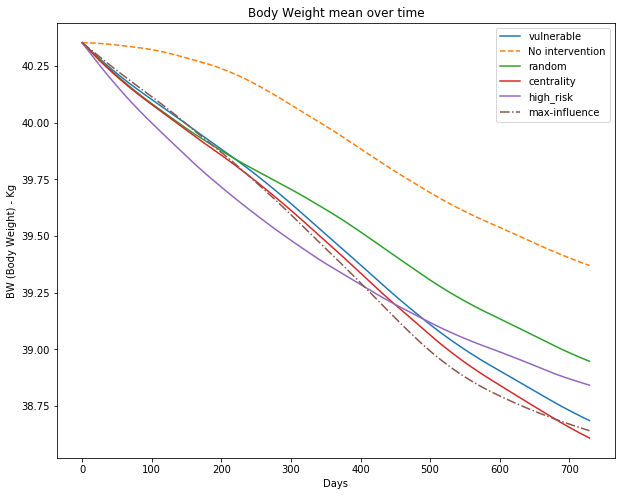

In [9]:
BW_df.plot(figsize=(10,8), style=styles)
plt.legend()
plt.title('Body Weight mean over time')
plt.xlabel('Days')
plt.ylabel('BW (Body Weight) - Kg')
#plt.ylim(46,48)
#plt.xlim(0,729)

In [10]:
PA_dict = {}
EI_dict = {}
BW_dict = {}
graph = sorted(nx.weakly_connected_component_subgraphs(G), key=len, reverse=True)[0]

diffuse_behavior(graph=graph, intervention=None, years=2)
results_dict = dict(graph.nodes(data=True))
for k, v in results_dict.items():
    PA_dict[k] = results_dict[k]['PA_hist']
for k, v in results_dict.items():
    EI_dict[k] = results_dict[k]['EI_hist']
for k, v in results_dict.items():
    BW_dict[k] = results_dict[k]['BW_hist']
    

Simulation without interventions.
Cluster contains 28 nodes and 696 edges!


Text(0,0.5,'BW (Body Weight) - Kg')

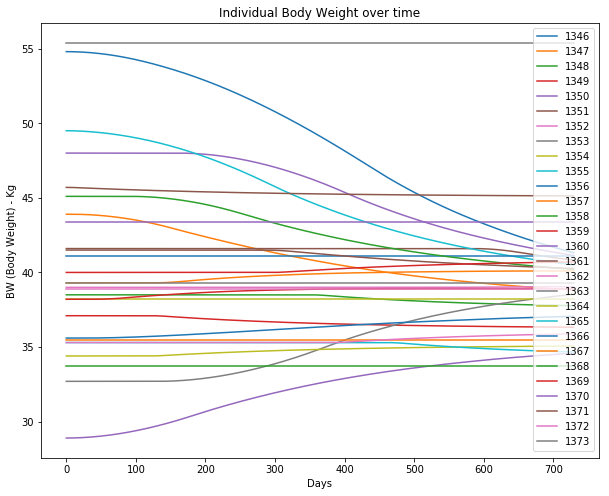

In [11]:
pd.DataFrame(BW_dict).plot(figsize=((10,8)))
plt.title('Individual Body Weight over time')
plt.xlabel('Days')
plt.ylabel('BW (Body Weight) - Kg')

#plt.legend().set_visible(False)

In [12]:
pd.DataFrame(BW_dict).head()

,1346,1347,1348,1349,1350,1351,1352,1353,1354,1355,...,1364,1365,1366,1367,1368,1369,1370,1371,1372,1373
0,54.800000,43.9,38.5,37.1,48.0,41.6,39.0,32.7,38.2,49.500000,...,34.4,35.3,35.6,35.5,33.7,40.0,43.4,45.700000,35.3,39.3
1,54.799888,43.9,38.5,37.1,48.0,41.6,39.0,32.7,38.2,49.499883,...,34.4,35.3,35.6,35.5,33.7,40.0,43.4,45.699858,35.3,39.3
2,54.799663,43.9,38.5,37.1,48.0,41.6,39.0,32.7,38.2,49.499649,...,34.4,35.3,35.6,35.5,33.7,40.0,43.4,45.699576,35.3,39.3
3,54.799327,43.9,38.5,37.1,48.0,41.6,39.0,32.7,38.2,49.499298,...,34.4,35.3,35.6,35.5,33.7,40.0,43.4,45.699153,35.3,39.3
4,54.798879,43.9,38.5,37.1,48.0,41.6,39.0,32.7,38.2,49.498830,...,34.4,35.3,35.6,35.5,33.7,40.0,43.4,45.698590,35.3,39.3


In [13]:
pd.DataFrame(BW_dict).tail()

,1346,1347,1348,1349,1350,1351,1352,1353,1354,1355,...,1364,1365,1366,1367,1368,1369,1370,1371,1372,1373
725,41.370576,38.833387,37.771309,36.329192,41.172735,40.846604,39.047965,38.520321,38.2,40.529839,...,35.066491,34.668038,37.052005,35.5,33.7,40.703659,43.4,45.129215,35.882059,39.3
726,41.358238,38.830575,37.770440,36.328889,41.165401,40.840691,39.048176,38.525357,38.2,40.524075,...,35.066782,34.666668,37.053157,35.5,33.7,40.704324,43.4,45.129028,35.882894,39.3
727,41.345941,38.827773,37.769574,36.328587,41.158091,40.834798,39.048386,38.530376,38.2,40.518330,...,35.067072,34.665304,37.054305,35.5,33.7,40.704986,43.4,45.128842,35.883725,39.3
728,41.333683,38.824980,37.768712,36.328287,41.150806,40.828924,39.048595,38.535377,38.2,40.512604,...,35.067361,34.663945,37.055449,35.5,33.7,40.705645,43.4,45.128657,35.884552,39.3
729,41.321465,38.822197,37.767853,36.327987,41.143545,40.823069,39.048804,38.540361,38.2,40.506897,...,35.067649,34.662593,37.056589,35.5,33.7,40.706302,43.4,45.128473,35.885377,39.3


In [14]:
graph.nodes()

NodeView((1347, 1346, 1349, 1350, 1351, 1352, 1357, 1358, 1362, 1365, 1368, 1369, 1372, 1355, 1359, 1364, 1367, 1370, 1371, 1373, 1348, 1353, 1354, 1356, 1361, 1363, 1366, 1360))

### Full Graph

In [15]:
interventions_list = ['vulnerable', None, 'random', 'centrality', 'high_risk', 'max-influence']
#interventions_list = ['max-influence', None]
factor='PA'
objective='all'
BW_df = pd.DataFrame()
BMI_df = pd.DataFrame()

for intervention in interventions_list:
    BW_dict = {}
    BMI_dict = {}
    graphs = sorted(nx.weakly_connected_component_subgraphs(G), key=len, reverse=True)
    for i in range(len(graphs)):
        diffuse_behavior(graph=graphs[i], intervention=intervention, factor=factor, objective=objective, years=2)
        results_dict = dict(graphs[i].nodes(data=True))
        for k, v in results_dict.items():
            BW_dict[k] = results_dict[k]['BW_hist']
        for k, v in results_dict.items():
            BMI_dict[k] = results_dict[k]['BMI_hist']

    # Create label for no intervention
    intervention_label = 'No intervention' if intervention is None else intervention
    BW_df[intervention_label] = pd.DataFrame(BW_dict).T.mean()
    BMI_df[intervention_label] = pd.DataFrame(BMI_dict).T.mean()

Intervention started:  vulnerable
Cluster contains 28 nodes and 696 edges!
Intervention started:  vulnerable
Cluster contains 25 nodes and 290 edges!
Intervention started:  vulnerable
Cluster contains 21 nodes and 305 edges!
Intervention started:  vulnerable
Cluster contains 20 nodes and 269 edges!
Intervention started:  vulnerable
Cluster contains 20 nodes and 318 edges!
Intervention started:  vulnerable
Cluster contains 19 nodes and 243 edges!
Intervention started:  vulnerable
Cluster contains 19 nodes and 240 edges!
Intervention started:  vulnerable
Cluster contains 19 nodes and 226 edges!
Intervention started:  vulnerable
Cluster contains 18 nodes and 226 edges!
Intervention started:  vulnerable
Cluster contains 18 nodes and 279 edges!
Intervention started:  vulnerable
Cluster contains 17 nodes and 194 edges!
Intervention started:  vulnerable
Cluster contains 17 nodes and 207 edges!
Intervention started:  vulnerable
Cluster contains 17 nodes and 232 edges!
Intervention started:  vu

Intervention started:  centrality
Cluster contains 6 nodes and 21 edges!
Intervention started:  centrality
Cluster contains 5 nodes and 15 edges!
Intervention started:  centrality
Cluster contains 3 nodes and 3 edges!
Intervention started:  high_risk
Cluster contains 28 nodes and 696 edges!
Intervention started:  high_risk
Cluster contains 25 nodes and 290 edges!
Intervention started:  high_risk
Cluster contains 21 nodes and 305 edges!
Intervention started:  high_risk
Cluster contains 20 nodes and 269 edges!
Intervention started:  high_risk
Cluster contains 20 nodes and 318 edges!
Intervention started:  high_risk
Cluster contains 19 nodes and 243 edges!
Intervention started:  high_risk
Cluster contains 19 nodes and 240 edges!
Intervention started:  high_risk
Cluster contains 19 nodes and 226 edges!
Intervention started:  high_risk
Cluster contains 18 nodes and 226 edges!
Intervention started:  high_risk
Cluster contains 18 nodes and 279 edges!
Intervention started:  high_risk
Cluster c

Impact node #1350: 	obese: 0.0000 	overweight: -7.7715 	both: -7.7715 	all: -37.0951 
Impact node #1351: 	obese: 0.0000 	overweight: -9.1257 	both: -9.1257 	all: -38.3063 
Impact node #1352: 	obese: 0.0000 	overweight: -6.9816 	both: -6.9816 	all: -35.2500 
Impact node #1353: 	obese: 0.0000 	overweight: -8.3651 	both: -8.3651 	all: -37.5840 
Impact node #1354: 	obese: 0.0000 	overweight: -6.8564 	both: -6.8564 	all: -35.4474 
Impact node #1355: 	obese: -4.1546 	overweight: 1.9775 	both: -2.1771 	all: -29.6793 
Impact node #1356: 	obese: 0.0000 	overweight: -6.4997 	both: -6.4997 	all: -34.7164 
Impact node #1357: 	obese: 0.0000 	overweight: -7.8368 	both: -7.8368 	all: -37.3826 
Impact node #1358: 	obese: 0.0000 	overweight: -7.5699 	both: -7.5699 	all: -33.5610 
Impact node #1359: 	obese: 0.0000 	overweight: -7.8265 	both: -7.8265 	all: -37.1848 
Impact node #1361: 	obese: 0.0000 	overweight: -8.0343 	both: -8.0343 	all: -37.0933 
Impact node #1362: 	obese: 0.0000 	overweight: -6.4081

Impact node #2719: 	obese: 4.5510 	overweight: 9.7687 	both: 14.3197 	all: 17.3014 
Impact node #2720: 	obese: -2.6879 	overweight: 17.3631 	both: 14.6752 	all: 17.6480 
Impact node #2722: 	obese: 3.7204 	overweight: 12.4140 	both: 16.1344 	all: 18.7933 
Impact node #2725: 	obese: 12.4810 	overweight: 14.4916 	both: 26.9726 	all: 26.0297 
Impact node #2726: 	obese: 3.6313 	overweight: 12.1423 	both: 15.7736 	all: 19.8759 
Impact node #2727: 	obese: 9.2680 	overweight: 5.4197 	both: 14.6877 	all: 17.6162 
Impact node #2728: 	obese: 9.4717 	overweight: 4.7516 	both: 14.2233 	all: 16.0529 
Impact node #2729: 	obese: -3.7292 	overweight: 18.4880 	both: 14.7588 	all: 13.3022 
Impact node #2730: 	obese: -2.8151 	overweight: 18.3485 	both: 15.5334 	all: 17.5072 
Impact node #2731: 	obese: -2.6853 	overweight: 14.6850 	both: 11.9997 	all: 14.1972 
Impact node #2732: 	obese: 8.1061 	overweight: -2.2166 	both: 5.8895 	all: 7.5049 
Impact node #2734: 	obese: 3.6214 	overweight: 12.2631 	both: 15.

Impact node #1380: 	obese: 9.2167 	overweight: 11.4304 	both: 20.6471 	all: 20.9896 
Impact node #1381: 	obese: 9.5580 	overweight: 9.9784 	both: 19.5364 	all: 20.9439 
Impact node #1382: 	obese: 9.9606 	overweight: 9.8010 	both: 19.7617 	all: 20.8320 
Impact node #1383: 	obese: 9.9258 	overweight: 8.6046 	both: 18.5304 	all: 19.8847 
Impact node #1385: 	obese: -2.3106 	overweight: 15.3743 	both: 13.0637 	all: 15.2019 
Impact node #1386: 	obese: 9.8449 	overweight: 11.6332 	both: 21.4781 	all: 22.9105 
Impact node #1389: 	obese: 9.4874 	overweight: 9.8637 	both: 19.3511 	all: 19.1914 
Impact node #1390: 	obese: 9.3671 	overweight: 11.3421 	both: 20.7091 	all: 22.7394 
Impact node #1391: 	obese: 9.6942 	overweight: 9.8271 	both: 19.5214 	all: 20.5468 
Impact node #1392: 	obese: 9.3768 	overweight: 1.2509 	both: 10.6277 	all: 12.3374 
Impact node #1393: 	obese: 9.8240 	overweight: 9.2028 	both: 19.0268 	all: 20.5189 
Impact node #1394: 	obese: 9.7687 	overweight: 11.4415 	both: 21.2103 	

Impact node #2827: 	obese: 0.8586 	overweight: 51.0497 	both: 51.9083 	all: 53.5374 
Impact node #2828: 	obese: 3.0430 	overweight: 49.1674 	both: 52.2105 	all: 53.2052 
Impact node #2829: 	obese: 15.3095 	overweight: 39.1494 	both: 54.4589 	all: 55.4215 
Impact node #2830: 	obese: 1.0600 	overweight: 37.8830 	both: 38.9430 	all: 42.1937 
Impact node #2831: 	obese: 1.0772 	overweight: 49.8889 	both: 50.9662 	all: 52.4563 
Impact node #2832: 	obese: 11.1590 	overweight: 41.8404 	both: 52.9994 	all: 54.6266 
Impact node #2833: 	obese: 1.1582 	overweight: 47.2322 	both: 48.3904 	all: 49.7714 
Impact node #2811: 	obese: 10.6811 	overweight: 42.3504 	both: 53.0315 	all: 54.9855 
Impact node #2812: 	obese: 1.3088 	overweight: 50.2244 	both: 51.5332 	all: 52.4111 
Impact node #2813: 	obese: 0.2492 	overweight: 43.8732 	both: 44.1224 	all: 45.2258 
Impact node #2814: 	obese: 0.9037 	overweight: 47.4920 	both: 48.3956 	all: 47.6586 
Keys in order of impact:  [2820, 2825, 2830, 2813, 2814, 2833,

Impact node #2039: 	obese: -14.1707 	overweight: -0.5675 	both: -14.7382 	all: -19.8290 
Impact node #2040: 	obese: -12.2534 	overweight: -9.7183 	both: -21.9717 	all: -16.0286 
Impact node #2041: 	obese: -8.7476 	overweight: -9.6735 	both: -18.4211 	all: -13.1234 
Impact node #2043: 	obese: -14.4634 	overweight: -10.6532 	both: -25.1165 	all: -20.1077 
Impact node #2044: 	obese: -13.7533 	overweight: -10.6650 	both: -24.4184 	all: -19.4158 
Impact node #2045: 	obese: -13.7828 	overweight: -10.7334 	both: -24.5162 	all: -19.5506 
Keys in order of impact:  [2036, 2051, 2043, 2039, 2045, 2044, 2048, 2038, 2035, 2034, 2026, 2031, 2052, 2025, 2040, 2041, 2037, 2032]
Node #1 selected: 2036 with an BW impact of -21.19685402299725!

Impact node #2048: 	obese: -15.1883 	overweight: -0.2643 	both: -15.4526 	all: -21.0700 
Impact node #2051: 	obese: -15.7233 	overweight: 0.1739 	both: -15.5494 	all: -23.9332 
Impact node #2052: 	obese: -15.1799 	overweight: 0.3052 	both: -14.8747 	all: -20.5539 

Impact node #966: 	obese: -1.0953 	overweight: 2.7376 	both: 1.6423 	all: 7.3166 
Impact node #967: 	obese: -0.8929 	overweight: 8.4055 	both: 7.5127 	all: 8.0081 
Impact node #968: 	obese: -1.5433 	overweight: 8.3610 	both: 6.8177 	all: 7.3653 
Impact node #971: 	obese: -1.1384 	overweight: 8.2191 	both: 7.0807 	all: 6.5905 
Impact node #972: 	obese: -1.1110 	overweight: 10.6405 	both: 9.5295 	all: 9.8902 
Impact node #973: 	obese: -1.3348 	overweight: 8.5343 	both: 7.1994 	all: 7.2982 
Impact node #974: 	obese: -2.3976 	overweight: 2.4417 	both: 0.0441 	all: 5.8222 
Impact node #975: 	obese: -1.0244 	overweight: 8.5541 	both: 7.5297 	all: 7.6456 
Impact node #977: 	obese: -2.6304 	overweight: 2.6962 	both: 0.0658 	all: 4.8957 
Impact node #978: 	obese: -2.6114 	overweight: 2.6241 	both: 0.0127 	all: 4.6222 
Impact node #979: 	obese: 1.1552 	overweight: 8.7565 	both: 9.9118 	all: 10.9941 
Impact node #980: 	obese: -2.4797 	overweight: 2.5021 	both: 0.0224 	all: 4.9979 
Impact node #98

Impact node #2092: 	obese: 0.0000 	overweight: 9.8182 	both: 9.8182 	all: 16.9942 
Impact node #2093: 	obese: 0.0000 	overweight: 9.9778 	both: 9.9778 	all: 17.9587 
Keys in order of impact:  [2083, 2078, 2077, 2088, 2081, 2085, 2092, 2091, 2086, 2080, 2093, 2089, 2076, 2084, 2079, 2087]
Node #2 selected: 2083 with an BW impact of 10.344658520292764!

Applying interventions for the nodes in the list: [2082, 2083]

Cluster contains 17 nodes and 232 edges!
Intervention started:  max-influence

#######################################
Max-influence started!
Objective function:  all
#######################################

This max-influence simulation is for a network with 16 nodes and 208 edges
Number of nodes to select:  2
Impact node #2003: 	obese: -0.9840 	overweight: 0.0000 	both: -0.9840 	all: -0.5601 
Impact node #2004: 	obese: 0.9814 	overweight: -1.7152 	both: -0.7337 	all: 1.8860 
Impact node #2006: 	obese: -0.5910 	overweight: -1.7906 	both: -2.3816 	all: -1.9590 
Impact node #2

Impact node #1558: 	obese: -1.1560 	overweight: 3.5078 	both: 2.3518 	all: 4.7467 
Impact node #1559: 	obese: -1.1405 	overweight: 3.4010 	both: 2.2605 	all: 4.4061 
Impact node #1560: 	obese: -1.4646 	overweight: 3.5192 	both: 2.0546 	all: 4.4124 
Impact node #1561: 	obese: -1.7753 	overweight: 0.0000 	both: -1.7753 	all: 0.1363 
Impact node #1562: 	obese: 9.0492 	overweight: -8.0334 	both: 1.0157 	all: 2.7548 
Impact node #1563: 	obese: -1.3443 	overweight: -4.9899 	both: -6.3342 	all: -4.6788 
Impact node #1564: 	obese: 0.2774 	overweight: 3.6376 	both: 3.9151 	all: 6.2769 
Keys in order of impact:  [1563, 1549, 1553, 1561, 1562, 1559, 1560, 1548, 1558, 1550, 1564, 1556, 1555, 1551, 1552]
Node #1 selected: 1563 with an BW impact of -4.6788319269181216!

Impact node #1548: 	obese: -11.6184 	overweight: 7.1655 	both: -4.4530 	all: -2.1326 
Impact node #1549: 	obese: -7.5608 	overweight: -5.2131 	both: -12.7739 	all: -11.1410 
Impact node #1550: 	obese: -9.7366 	overweight: 5.9933 	bot

Impact node #2559: 	obese: 26.3979 	overweight: 14.5565 	both: 40.9544 	all: 40.8589 
Keys in order of impact:  [2574, 2562, 2569, 2564, 2567, 2571, 2559, 2566, 2573, 2568, 2560]
Node #1 selected: 2574 with an BW impact of 30.382363262276222!

Applying interventions for the nodes in the list: [2574]

Cluster contains 11 nodes and 91 edges!
Intervention started:  max-influence

#######################################
Max-influence started!
Objective function:  all
#######################################

This max-influence simulation is for a network with 11 nodes and 73 edges
Number of nodes to select:  1
Impact node #2849: 	obese: 2.2586 	overweight: -2.5596 	both: -0.3010 	all: -2.0239 
Impact node #2853: 	obese: 3.9373 	overweight: -2.0456 	both: 1.8917 	all: -0.8533 
Impact node #2857: 	obese: 2.4544 	overweight: -8.3026 	both: -5.8482 	all: -8.3223 
Impact node #2858: 	obese: 0.0000 	overweight: -3.6483 	both: -3.6483 	all: -6.5018 
Impact node #2862: 	obese: 3.1832 	overweight: -

Impact node #2881: 	obese: 10.8855 	overweight: 16.7459 	both: 27.6314 	all: 27.6314 
Impact node #2867: 	obese: 27.7455 	overweight: 8.7853 	both: 36.5308 	all: 35.6418 
Impact node #2885: 	obese: 0.0311 	overweight: 20.1578 	both: 20.1889 	all: 19.2971 
Impact node #2869: 	obese: 22.8652 	overweight: 4.3506 	both: 27.2158 	all: 26.7137 
Impact node #2874: 	obese: 0.0000 	overweight: 23.4034 	both: 23.4034 	all: 22.5397 
Keys in order of impact:  [2880, 2885, 2874, 2869, 2881, 2867]
Node #1 selected: 2880 with an BW impact of 17.22741304867217!

Applying interventions for the nodes in the list: [2880]

Cluster contains 6 nodes and 21 edges!
Intervention started:  max-influence

#######################################
Max-influence started!
Objective function:  all
#######################################

This max-influence simulation is for a network with 5 nodes and 15 edges
Number of nodes to select:  0
Applying interventions for the nodes in the list: []

Cluster contains 5 nodes a

In [16]:
pd.DataFrame(BW_dict).T.mean()[pd.DataFrame(BW_dict).T.mean().shape[0] - 1]

44.66365234863787

(0, 729)

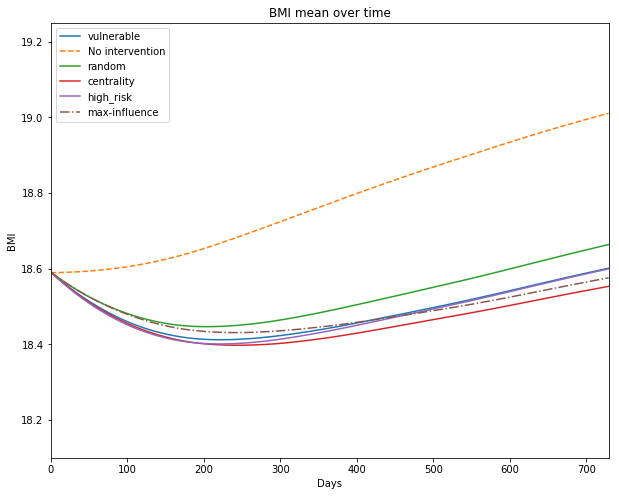

In [28]:
BMI_df.plot(figsize=(10,8), style=styles)
plt.legend()
plt.title('BMI mean over time')
plt.xlabel('Days')
plt.ylabel('BMI')
plt.ylim(18.1,19.25)
plt.xlim(0,729)

(0, 729)

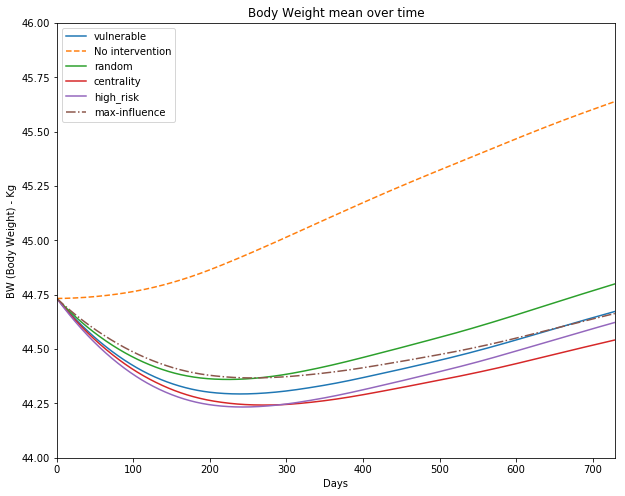

In [29]:
BW_df.plot(figsize=(10,8), style=styles)
plt.legend()
plt.title('Body Weight mean over time')
plt.xlabel('Days')
plt.ylabel('BW (Body Weight) - Kg')
plt.ylim(44,46)
plt.xlim(0,729)

In [19]:
PA_dict = {}
EI_dict = {}
graphs = sorted(nx.weakly_connected_component_subgraphs(G), key=len, reverse=True)
for i in range(len(graphs)):
    diffuse_behavior(graph=graphs[i], intervention=None, years=2)
    results_dict = dict(graphs[i].nodes(data=True))
    for k, v in results_dict.items():
        PA_dict[k] = results_dict[k]['PA_hist']
    for k, v in results_dict.items():
        EI_dict[k] = results_dict[k]['EI_hist']

Simulation without interventions.
Cluster contains 28 nodes and 696 edges!
Simulation without interventions.
Cluster contains 25 nodes and 290 edges!
Simulation without interventions.
Cluster contains 21 nodes and 305 edges!
Simulation without interventions.
Cluster contains 20 nodes and 269 edges!
Simulation without interventions.
Cluster contains 20 nodes and 318 edges!
Simulation without interventions.
Cluster contains 19 nodes and 243 edges!
Simulation without interventions.
Cluster contains 19 nodes and 240 edges!
Simulation without interventions.
Cluster contains 19 nodes and 226 edges!
Simulation without interventions.
Cluster contains 18 nodes and 226 edges!
Simulation without interventions.
Cluster contains 18 nodes and 279 edges!
Simulation without interventions.
Cluster contains 17 nodes and 194 edges!
Simulation without interventions.
Cluster contains 17 nodes and 207 edges!
Simulation without interventions.
Cluster contains 17 nodes and 232 edges!
Simulation without interv

In [20]:
#pd.DataFrame(EI_dict).T.mean()

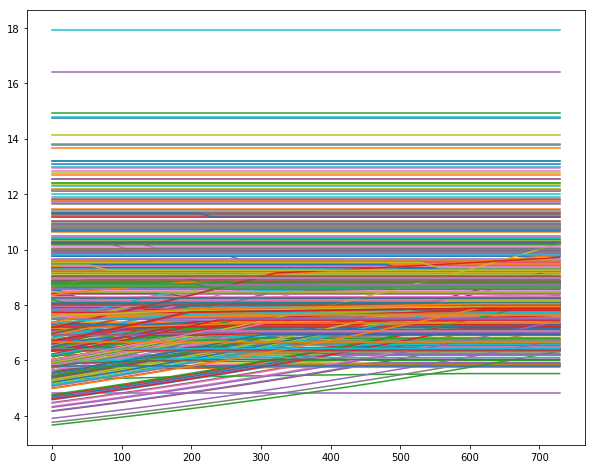

In [21]:
pd.DataFrame(EI_dict).plot(figsize=((10,8)))
plt.legend().set_visible(False)

In [ ]:
graphs[0].nodes()[1347]['env']

In [ ]:
graph = graphs[0]
list_nodes = list(graph)

BMI_dict = {node: graph.nodes()[node]['BMI_hist'][0] for node in list_nodes}

In [ ]:
BMI_dict

In [ ]:
keys_sorted = sorted(BMI_dict, key=BMI_dict.get, reverse=True)

In [ ]:
keys_sorted

In [ ]:
graphs[0]

In [ ]:
graphs[0].copy()

In [ ]:
plt.figure(figsize=(12,8))
for node in GS.nodes():
    plt.plot(GS.nodes()[node]['BMI_hist'])

In [ ]:
plt.figure(figsize=(12,8))
for node in GS.nodes():
    plt.plot(GS.nodes()[node]['EI_hist'])

In [ ]:
plt.figure(figsize=(12,8))
for node in GS.nodes():
    plt.plot(GS.nodes()[node]['BW_hist'])

In [ ]:
age_mean = []
for node in GS.nodes():
    age_mean.append(GS.nodes()[node]['age'])

In [ ]:
np.mean(age_mean)